In [2]:
import numpy as np
import matplotlib.pyplot as plt
bandwidth = 125e3
spreading_factor = 7
def gen_freq_evo(symbol, bw, sf):
    n_chips=2**sf
    symbol_duration = n_chips/bw
    nyquist_rate = 2*bw
    sampling_period = 1/nyquist_rate
    samples_per_symbol = symbol_duration/sampling_period
    
    
    timeline = np.linspace(0, symbol_duration, int(samples_per_symbol))
    print("timeline = [",timeline[:10],...,timeline[-10:],"]")
    freq_evo = []
    slope = bw**2/n_chips
    y_intercept = symbol*bw/n_chips
    for i in range(len(timeline)):
        freq_evo.append((slope * timeline[i] + y_intercept)%bw)
    return timeline, freq_evo


        

In [3]:
def gen_signal_from_freq_evo(timeline, freq_evo, sf):
    signal = []
    for i in range(len(timeline)):

        coeff = 1/(np.sqrt(2**sf))
        phase = 2*np.pi*freq_evo[i]*timeline[i]
        signal.append(coeff*np.exp(1j*phase))
    return signal



timeline = [ [0.00000000e+00 4.01568627e-06 8.03137255e-06 1.20470588e-05
 1.60627451e-05 2.00784314e-05 2.40941176e-05 2.81098039e-05
 3.21254902e-05 3.61411765e-05] Ellipsis [0.00098786 0.00099187 0.00099589 0.00099991 0.00100392 0.00100794
 0.00101195 0.00101597 0.00101998 0.001024  ] ]


Text(0.5, 1.0, 'Real part of the tx signal')

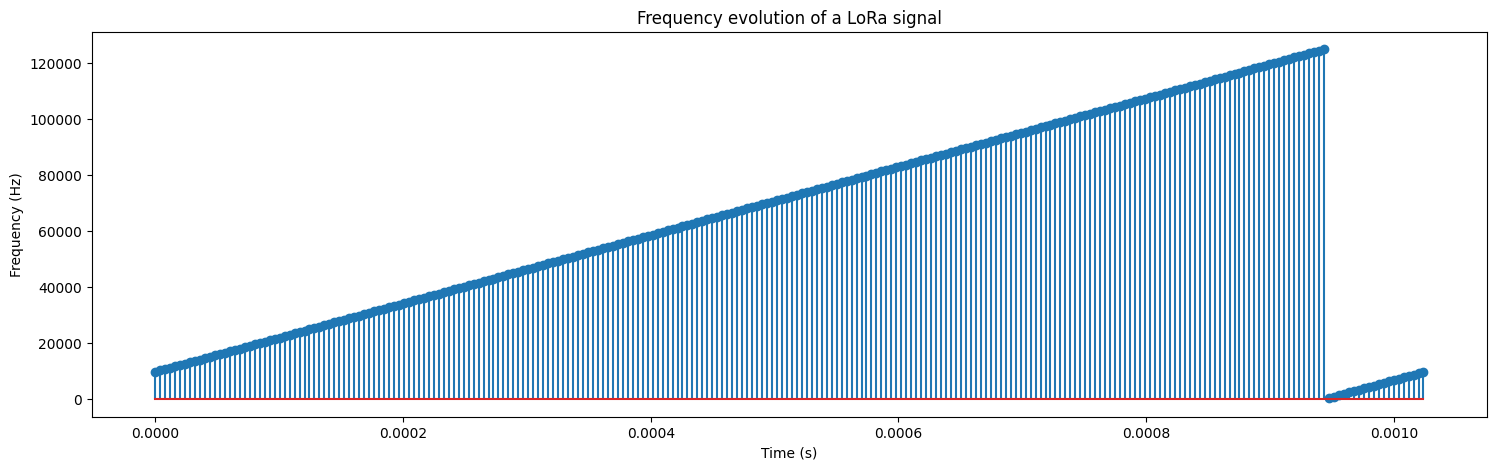

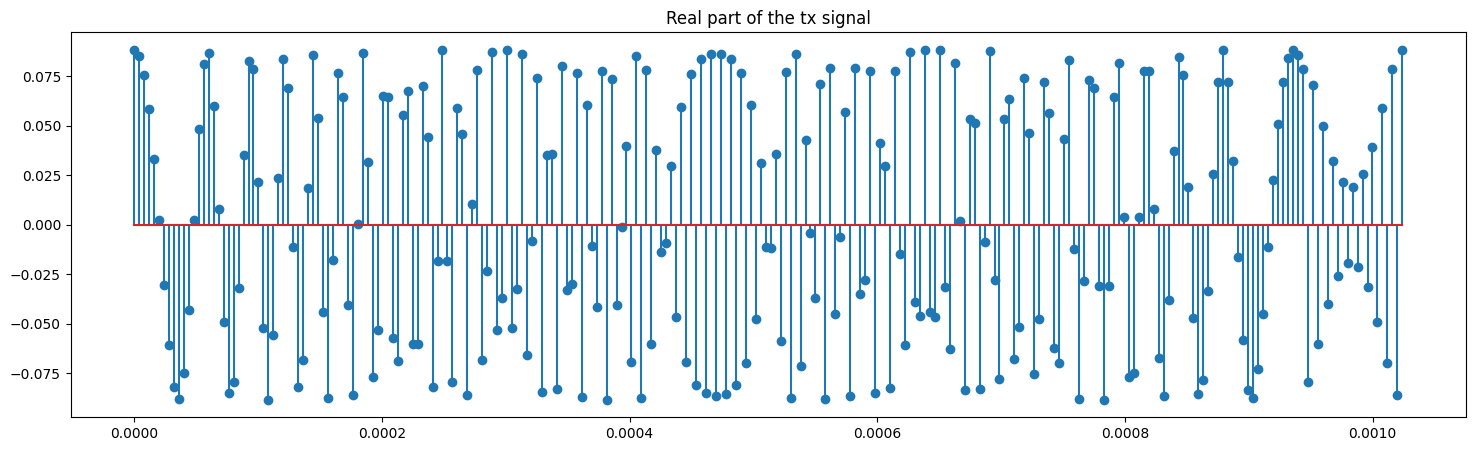

In [4]:
spreading_factor = 7
bandwidth = 125e3
symbol = 10
timeline, freq_evo = gen_freq_evo(symbol, bandwidth, spreading_factor)
plt.figure(figsize=(18, 5))
plt.stem(timeline, freq_evo)
plt.title("Frequency evolution of a LoRa signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

signal = gen_signal_from_freq_evo(timeline, freq_evo, spreading_factor)
plt.figure(figsize=(18, 5))
plt.stem(timeline, np.real(signal))
plt.title("Real part of the tx signal")


la cantidad de muestras son:  256
la distancia entre muestra y muestra es:  4e-06  Es decir, que hay una muestra con frecuencia de  250000.0  Hz


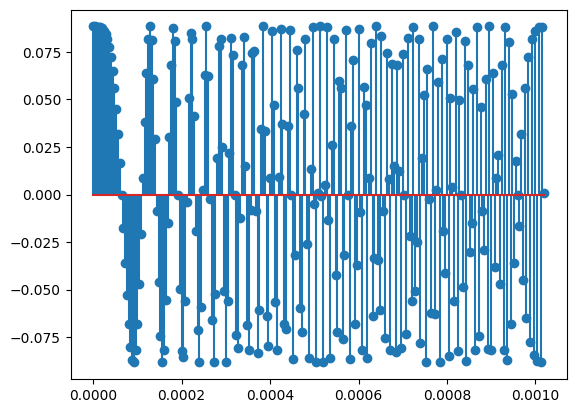

In [5]:
def LoRa_modulation(SF, BW, s, delta, c=1):
    Ts = 2**SF
    T = 1/BW
    num_samples = int(2**SF * 1/delta)
    time = []
    lora_symbols = []
    lora_symbols_f = []
    k = s
    fMax = (2**SF - 1) * BW / (2**SF)

    for n in range(num_samples):
        f = k * BW / (2**SF)
        t = k * T
        time.append(t)
        if f > fMax:
            k = k - Ts
            f = k * BW / (2**SF)
        sample = (1 / (np.sqrt(2**SF))) * np.exp(c * 1j * 2 * np.pi * f * t * 1/2)
        lora_symbols.append(sample)
        lora_symbols_f.append(f)
        k = k + delta
    return lora_symbols, lora_symbols_f, num_samples, fMax, time

lora_symbols, lora_symbols_f,num_samples, fMax, time = LoRa_modulation(7, 125e3, 0, 0.5)
plt.stem(time, np.real(lora_symbols))
print("la cantidad de muestras son: ",len(lora_symbols))
print("la distancia entre muestra y muestra es: ",time[1]-time[0]," Es decir, que hay una muestra con frecuencia de ",1/(time[1]-time[0])," Hz")
